## Combine all results files into one Pandas DF

In [27]:
import pandas as pd
import os

def combine_csv_files(folder_path):
    # List to store DataFrames
    dataframes = []
    
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a .csv
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            dataframes.append(df)
    
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Example usage
folder_path = "Results/Matching/unprocessed"
MOF_ChemUnity = combine_csv_files(folder_path)


In [41]:
input

,DOI,File Name,File Format,File Path,Journal,CSD code,Chemical Name,Space group,Metal types,Molecular formula,Synonyms,a,b,c,Publisher
0,10.1016/j.poly.2015.01.036,10.1016_j.poly.2015.01.036.xml,xml,/home/tom-pruyn/Documents/TDM Papers/All paper...,Journal(Polyhedron),HOSDAW,"catena-[bis(μ3-5-chloro-2-oxidobenzene-1,3-dis...",C2/c,Cd,C96Cd6Cl4H64N12O32S8,[],14.1043,20.3070,19.7227,Elsevier
1,10.1016/j.micromeso.2013.01.020,10.1016_j.micromeso.2013.01.020.xml,xml,/home/tom-pruyn/Documents/TDM Papers/All paper...,Journal(Microporous and Mesoporous Materials),FEVDIV,"catena-((μ3-3,5-bis(4-Pyridyl)benzoato-N,N',O,...",P21/c,Ni,C136H88N16Ni4O16,[],8.3722,34.9230,11.4888,Elsevier
2,10.1016/j.micromeso.2013.01.020,10.1016_j.micromeso.2013.01.020.xml,xml,/home/tom-pruyn/Documents/TDM Papers/All paper...,Journal(Microporous and Mesoporous Materials),FEVDER,"catena-((μ3-3,5-bis(4-Pyridyl)benzoato-N,N',O,...",P21/c,Co,C136Co4H88N16O16,[],8.4073,35.1080,11.4910,Elsevier
3,10.1016/j.ica.2013.04.004,10.1016_j.ica.2013.04.004.xml,xml,/home/tom-pruyn/Documents/TDM Papers/All paper...,Journal(Inorganica Chimica Acta),BIKBAA,"catena-[bis(μ2-2,2'-((2,5-Dimethoxy-1,4-phenyl...",P-1,Er,C72Er2H72N14O32,[],10.2963,12.1680,19.5780,Elsevier
4,10.1016/j.ica.2013.04.004,10.1016_j.ica.2013.04.004.xml,xml,/home/tom-pruyn/Documents/TDM Papers/All paper...,Journal(Inorganica Chimica Acta),BIJZUR,"catena-[bis(μ2-2,2'-((2,5-Dimethoxy-1,4-phenyl...",P-1,Eu,C72Eu2H72N14O32,[],10.2820,12.2030,19.5770,Elsevier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16239,10.1021/ic050314t,ic050314t.tei.xml,xml,/home/tom-pruyn/Documents/TDM Papers/All paper...,Journal(Inorganic Chemistry),NAXLII,"catena-(1,4-bis(N-benzimidazolium-1-yl)butane ...",P-1,Zn,C54H58N12O16P4Zn4,[],10.3187,13.6651,16.1419,ACS
16240,10.1021/ic8017826,ic8017826.tei.xml,xml,/home/tom-pruyn/Documents/TDM Papers/All paper...,Journal(Inorganic Chemistry),SONTOF,"catena-((μ4-2-amino-1,4-benzenedicarboxylato-O...",P-1,Dy,C24Dy2H4N6O12,[],10.5059,11.1476,12.7931,ACS
16241,10.1021/ic8017826,ic8017826.tei.xml,xml,/home/tom-pruyn/Documents/TDM Papers/All paper...,Journal(Inorganic Chemistry),SONTIZ,"catena-((μ4-2-amino-1,4-benzenedicarboxylato-O...",P-1,Tb,C24H4N6O12Tb2,[],10.5390,11.2180,12.8420,ACS
16242,10.1021/ic8017826,ic8017826.tei.xml,xml,/home/tom-pruyn/Documents/TDM Papers/All paper...,Journal(Inorganic Chemistry),SONTAR,"catena-((μ4-2-amino-1,4-benzenedicarboxylato-O...",P-1,Pr,C24H15N3O12Pr2,[],10.4951,11.3396,12.7954,ACS


In [28]:
## Add publisher column 

import pandas as pd

# Load the combined_dois.csv
combined_dois_path = "Results/Publisher_List.csv"  # Replace with the actual file path
combined_dois = pd.read_csv(combined_dois_path)

# Create a dictionary for fast lookup of DOI to Publisher
doi_to_publisher = dict(zip(combined_dois["DOI"], combined_dois["Publisher"]))

# Initialize a new column for the Publisher in MOF_ChemUnity
MOF_ChemUnity["Publisher"] = None

# Iterate through MOF_ChemUnity and update the Publisher column
for index, row in MOF_ChemUnity.iterrows():
    doi = row["DOI"]
    if doi in doi_to_publisher:
       MOF_ChemUnity.at[index, "Publisher"] = doi_to_publisher[doi]
    else:
        print(f"DOI not found: {doi}")


In [29]:
## Add publisher column 

import pandas as pd
input = pd.read_csv("Results/input_data.csv")
publishers = pd.read_csv("Results/Publisher_List.csv")

# Create a dictionary for fast lookup of DOI to Publisher
doi_to_publisher = dict(zip(publishers["DOI"], publishers["Publisher"]))

# Initialize a new column for the Publisher in MOF_ChemUnity
input["Publisher"] = None

# Iterate through MOF_ChemUnity and update the Publisher column
for index, row in input.iterrows():
    doi = row["DOI"]
    if doi in doi_to_publisher:
       input.at[index, "Publisher"] = doi_to_publisher[doi]
    else:
        print(f"DOI not found: {doi}")

In [30]:
# Save publication_data to a CSV file
output_file = "Results/input_data.csv"  # Specify the desired output file name
input.to_csv(output_file, index=False)

print(f"DataFrame saved to {output_file}")

DataFrame saved to Results/input_data.csv


## Filter Out Incorrectly Formatted MOF Names

In [31]:
MOF_ChemUnity

,MOF Name,CSD Ref Code,Justification,DOI,Publisher
0,[Eu2(tda)2(H2O)3]·5H2O<|>compound 2,GIFFEI,"The MOF [Eu2(tda)2(H2O)3]·5H2O, also referred ...",10.1002/zaac.201200234,Wiley
1,[Sm2(tda)2(H2O)3]·5H2O<|>compound 1,GIFFAE,"The MOF [Sm2(tda)2(H2O)3]·5H2O, also referred ...",10.1002/zaac.201200234,Wiley
2,{[Ni3(BPTCA)2(H2O)2][Ni(H2O)6]·10H2O}n<|>compl...,KOFVOS,The MOF {[Ni3(BPTCA)2(H2O)2][Ni(H2O)6]·10H2O}n...,10.1002/zaac.201300500,Wiley
3,[Zn(H2O)(bpy)(Hdml)2]<|>compound 6,GUGWAI,The MOF [Zn(H2O)(bpy)(Hdml)2] matches the CSD ...,10.1002/zaac.201400336,Wiley
4,[Co3(C14H8O6S)3(DMA)2(MeOH)]·DMA<|>Ia,COWRIR,"The MOF [Co3(C14H8O6S)3(DMA)2(MeOH)]·DMA, refe...",10.1002/zaac.201400388,Wiley
...,...,...,...,...,...
15649,"[Zn(1,3-tzbaa)]n<|>compound 1",ROSKOB,"The MOF [Zn(1,3-tzbaa)]n, referred to as compo...",10.1039/C4CE00662C,RSC
15650,"[Zn(1,4-tzbaa)]n<|>compound 2",ROSKIV,"The MOF [Zn(1,4-tzbaa)]n, referred to as compo...",10.1039/C4CE00662C,RSC
15651,{[Co3(TDA)2(bpy)3]·6.75H2O}<|>compound 2,NOBVOR,"The MOF {[Co3(TDA)2(bpy)3]·6.75H2O}n, referred...",10.1039/C3QI00045A,RSC
15652,MMPF-7<|>C48H24N4O8.57In1.29,COKROL,The MOF MMPF-7 is described in the document as...,10.1039/c3ce41090k,RSC


In [32]:
MOF_ChemUnity.value_counts(['CSD Ref Code'])

CSD Ref Code  
not provided      480
Not provided       15
not applicable      3
OBEHIN              2
QIRGED              2
                 ... 
HITXUE              1
HITYUG              1
HIVBIA              1
HIVPIO              1
LUPVEZ              1
Name: count, Length: 15155, dtype: int64

In [33]:
MOF_ChemUnity = MOF_ChemUnity[~MOF_ChemUnity["CSD Ref Code"].isin(["not provided", "Not provided", "not applicable"])]

In [34]:
MOF_ChemUnity['CSD Ref Code'].value_counts()

CSD Ref Code
OBEHIN    2
QIRGED    2
BEPPAP    2
OHAPEU    2
GIFFEI    1
         ..
GEDRIS    1
SOTWOP    1
SOTWUV    1
SOTXAC    1
COKRUR    1
Name: count, Length: 15152, dtype: int64

In [35]:
# Filter rows where 'CSD Ref Code' is not in all caps (but allows numbers) - any entry that is in lower case indicates an incorrectly data point - as CSD Ref Codes are always in all caps
# Keep only rows where 'CSD Ref Code' is all caps or contains numbers
MOF_ChemUnity= MOF_ChemUnity[MOF_ChemUnity["CSD Ref Code"].str.match(r"^[A-Z0-9]+$", na=False)]

In [36]:
MOF_ChemUnity['CSD Ref Code'].value_counts()


CSD Ref Code
OBEHIN    2
QIRGED    2
BEPPAP    2
OHAPEU    2
GIFFEI    1
         ..
SOTWUV    1
SOTXAC    1
CEHLAD    1
SOWCOY    1
COKRUR    1
Name: count, Length: 15150, dtype: int64

In [37]:
MOF_ChemUnity

,MOF Name,CSD Ref Code,Justification,DOI,Publisher
0,[Eu2(tda)2(H2O)3]·5H2O<|>compound 2,GIFFEI,"The MOF [Eu2(tda)2(H2O)3]·5H2O, also referred ...",10.1002/zaac.201200234,Wiley
1,[Sm2(tda)2(H2O)3]·5H2O<|>compound 1,GIFFAE,"The MOF [Sm2(tda)2(H2O)3]·5H2O, also referred ...",10.1002/zaac.201200234,Wiley
2,{[Ni3(BPTCA)2(H2O)2][Ni(H2O)6]·10H2O}n<|>compl...,KOFVOS,The MOF {[Ni3(BPTCA)2(H2O)2][Ni(H2O)6]·10H2O}n...,10.1002/zaac.201300500,Wiley
3,[Zn(H2O)(bpy)(Hdml)2]<|>compound 6,GUGWAI,The MOF [Zn(H2O)(bpy)(Hdml)2] matches the CSD ...,10.1002/zaac.201400336,Wiley
4,[Co3(C14H8O6S)3(DMA)2(MeOH)]·DMA<|>Ia,COWRIR,"The MOF [Co3(C14H8O6S)3(DMA)2(MeOH)]·DMA, refe...",10.1002/zaac.201400388,Wiley
...,...,...,...,...,...
15649,"[Zn(1,3-tzbaa)]n<|>compound 1",ROSKOB,"The MOF [Zn(1,3-tzbaa)]n, referred to as compo...",10.1039/C4CE00662C,RSC
15650,"[Zn(1,4-tzbaa)]n<|>compound 2",ROSKIV,"The MOF [Zn(1,4-tzbaa)]n, referred to as compo...",10.1039/C4CE00662C,RSC
15651,{[Co3(TDA)2(bpy)3]·6.75H2O}<|>compound 2,NOBVOR,"The MOF {[Co3(TDA)2(bpy)3]·6.75H2O}n, referred...",10.1039/C3QI00045A,RSC
15652,MMPF-7<|>C48H24N4O8.57In1.29,COKROL,The MOF MMPF-7 is described in the document as...,10.1039/c3ce41090k,RSC


In [38]:
MOF_ChemUnity.to_csv("Results/Matching/Final/MOF_ChemUnity.csv", index=False)

In [39]:
MOF_ChemUnity['CSD Ref Code'].nunique()

15150

## Property Data Analysis

### Water Stability

In [61]:
def combine_csv_files(folder_path):
    # List to store DataFrames
    dataframes = []
    
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a .csv
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path, index_col=0)
            dataframes.append(df)
    
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Example usage
folder_path = "Results/Properties/Water Stability"
MOF_ChemUnity_WS = combine_csv_files(folder_path)


In [62]:
MOF_ChemUnity_WS.value_counts(['Value'])

Value                                        
Not provided                                     7073
Unstable                                          486
Stable                                            384
Insoluble                                          17
Insoluble in water                                  3
0.028                                               1
1.8                                                 1
12.8                                                1
29.1(0.3)                                           1
Insoluble in water or common organic solvent        1
Insoluble in water or common organic solvents       1
Partial degradation                                 1
Sparingly soluble in water                          1
Name: count, dtype: int64

In [63]:
# Filter the rows to only contain labelled WS Datapoints
MOF_ChemUnity_WS= MOF_ChemUnity_WS[MOF_ChemUnity_WS['Value'].isin(['Unstable', 'Stable', 'Insoluble', 'Insoluble in water', 'Insoluble in water or common organic solvent', 'Insoluble in water or common organic solvents'])]


In [64]:
MOF_ChemUnity_WS.value_counts(['Property'])

Property                        
Water Stability                     654
Water Stability of the MOF           10
(4-carboxylatopyridine)silver(I)      1
[(NiL1)2IJTCM)]·17H2O                 1
Zn(L)(H2O)2                           1
                                   ... 
Water Stability of CuCN.4CP           1
Water Stability of CuCN.PAZ           1
Water Stability of DUT-51(Hf)         1
Water Stability of IFMC-68            1
medi-MOF-1                            1
Name: count, Length: 230, dtype: int64

In [65]:
# Now that we have to change the "Property" label to "Water Stability" - this should be fine, as we filtered out irrelevant points based off "Value" 
# Change the value of every row in the 'Property' column to 'Water Stability'
MOF_ChemUnity_WS['Property'] = 'Water Stability'


### General Extraction

In [74]:
def combine_csv_files(folder_path):
    # List to store DataFrames
    dataframes = []
    
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a .csv
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path, index_col=0)
            dataframes.append(df)
    
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Example usage
folder_path = "Results/Properties/General"
MOF_ChemUnity_Gen = combine_csv_files(folder_path)


In [75]:
MOF_ChemUnity_Gen['Ref Code'].nunique()

6723

In [76]:
MOF_ChemUnity_Gen.value_counts(['Property'])

Property                     
space group                      4870
crystal system                   4638
cell volume                      2494
thermal stability                2048
density                          2035
molecular weight                 1027
chemical formula                  975
topology                          638
surface area                      599
magnetic susceptibility           465
pore volume                       260
porosity                          135
melting point                     123
magnetic moment                    70
pore diameter                      68
proton conductivity                34
thermal expansion coefficient      13
elastic constant                   12
heat capacity                       1
Name: count, dtype: int64

In [77]:
# Define the list of Property values to drop
properties_to_drop = ["space group", "crystal system", "cell volume", "chemical formula","heat capacity"]

# Filter the DataFrame to exclude these rows
MOF_ChemUnity_Gen = MOF_ChemUnity_Gen[~MOF_ChemUnity_Gen["Property"].isin(properties_to_drop)]


In [78]:
# Combine with WaterStability DF
MOF_ChemUnity_Props = pd.concat([MOF_ChemUnity_Gen, MOF_ChemUnity_WS], axis=0, ignore_index=True)

In [79]:
MOF_ChemUnity_Props['Reference'].nunique()

3815

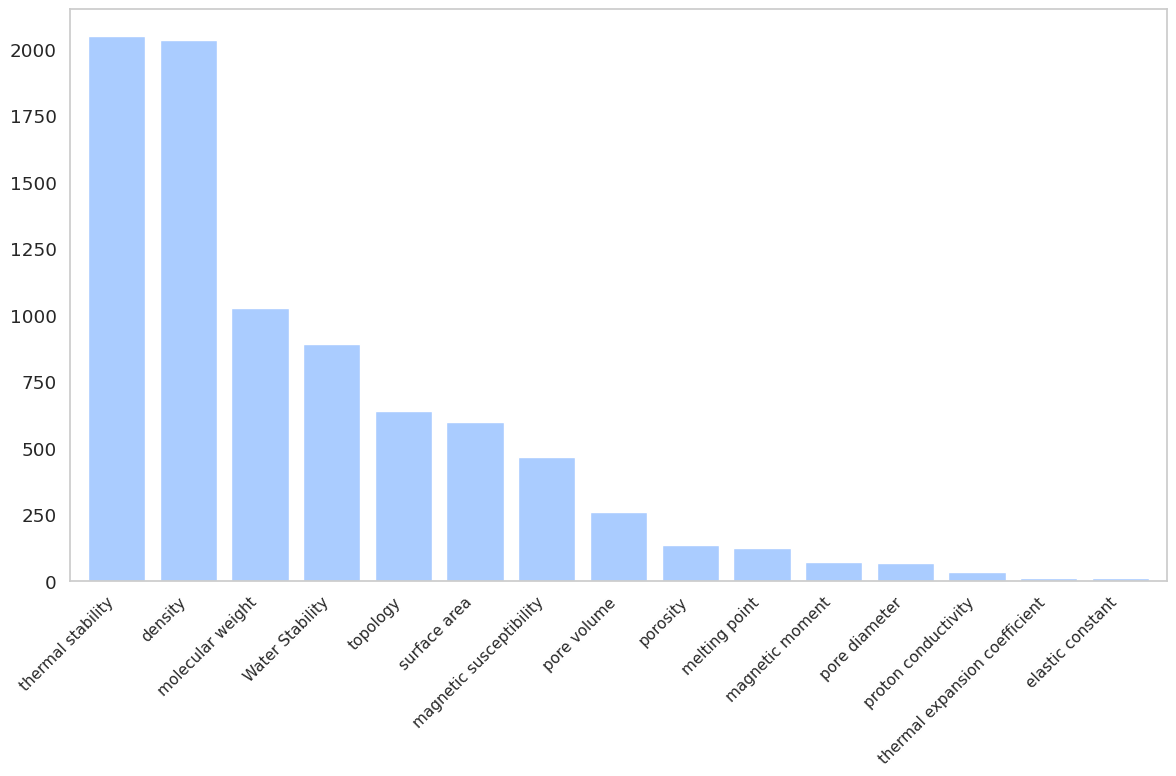

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'MOF_ChemUnity_Props' is your DataFrame
property_counts = MOF_ChemUnity_Props['Property'].value_counts()

# Set Seaborn style for consistent aesthetics
sns.set_theme(style="whitegrid", font_scale=1.2)

# Create the plot
plt.figure(figsize=(12, 8))
ax = property_counts.plot(
    kind='bar', 
    color='#aaccff',  # Consistent blue color
    edgecolor='black',  # Add borders to bars for a polished look
    width=0.8
)

# Add title and labels
ax.set_xlabel('')  # Remove x-axis label

# Customize x-ticks
plt.xticks(rotation=45, ha='right', fontsize=11)

# Remove gridlines
ax.grid(False)

# Add a tight layout for proper spacing
plt.tight_layout()

# Save the figure for publication
plt.savefig("property_value_counts.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()



In [32]:
MOF_ChemUnity_Props.to_csv("Results/Properties/Final/MOF_ChemUnity.csv", index=False)

## Applications

In [39]:
MOF_ChemUnity_Apps = combine_csv_files('Results/Applications')

In [40]:
MOF_ChemUnity_Apps.to_csv("Results/Applications/Final/MOF_ChemUnity_Apps.csv", index=False)

In [41]:
application_synonyms = {
    "CO2 Storage": [
        "CO2 Adsorption", "Carbon Capture", "CO2 Sequestration",
        "Carbon Dioxide Capture", "Carbon Dioxide Storage",
        "Carbon Dioxide Adsorption", "CO2 Uptake", "CO2 Retention", "CO2",
        "CO2 Capture", "Carbon Storage", "Carbon Sequestration",
        "Capture of CO2", "Storage of Carbon Dioxide", "Carbon Adsorption",
        "Carbon Dioxide Retention", "Carbon Dioxide Uptake",
        "Removing CO2", "CO2 Management", "CO2 Storage Materials",
        "Sequestration of Carbon", "Retention of Carbon Dioxide",
        "CO2 Reduction", "Carbon Absorption", "Capture of Carbon Dioxide"
    ],
    "CH4 Storage": [
        "Methane Adsorption", "CH4 Adsorption", "Methane Storage",
        "CH4 Retention", "Methane Sequestration",
        "Methane Retention", "CH4 Storage", "Methane Capture",
        "Capture of Methane", "Storage of Methane", "CH4 Uptake",
        "Methane Management", "Methane Adsorption Materials",
        "CH4 Reduction", "Methane Sequestration Systems"
    ],
    "H2 Storage": [
        "Hydrogen Storage", "H2 Adsorption", "Hydrogen Uptake",
        "Hydrogen Retention", "H2 Sequestration",
        "H2 Retention", "H2 Storage", "Hydrogen Capture",
        "Capture of Hydrogen", "Storage of Hydrogen",
        "Hydrogen Absorption", "Hydrogen Retention Systems",
        "H2 Adsorption Materials", "H2 Management"
    ],
    "Gas Separation": [
        "CO2/N2 Separation", "CO2/CH4 Separation", "H2/CO2 Separation",
        "Gas Selectivity", "Gas Diffusion", "Mixed Gas Separation",
        "Hydrocarbon Separation", "Gas Mixture Separation",
        "Separation of Gases", "Gas Mixture Selectivity",
        "Gas Adsorption Separation", "Gas Partitioning",
        "Gas Cleaning", "Gas Purification", "Gas Isolation",
        "Separation Technology", "Selective Gas Permeability",
        "Gas Filtering", "Gas Mixture Filtration"
    ],
    "Catalysis": [
        "Heterogeneous Catalysis", "Photocatalysis", "Electrocatalysis",
        "Catalytic Activity", "Catalyst", "Enzyme Mimic",
        "Oxidation Catalysis", "Reduction Catalysis", "Organic Synthesis Catalysis",
        "Catalytic Reaction", "Catalyst Activity", "Catalytic Process",
        "Catalyst Efficiency", "Catalysis Materials", "Reaction Catalysis",
        "Chemical Reaction Catalysis"
    ],
    "Water Purification": [
        "Water Treatment", "Wastewater Filtration", "Heavy Metal Removal",
        "Water Remediation", "Water Decontamination", "Clean Water Production",
        "Arsenic Removal", "Lead Removal", "Fluoride Removal",
        "Purification of Water", "Clean Water Treatment",
        "Water Filtration", "Water Cleaning", "Water Detoxification",
        "Safe Drinking Water", "Water Purity", "Water Purification Systems",
        "Filtration of Water"
    ],
    "Pollutant Degradation": [
        "Pollution Removal", "Degradation of Organic Pollutants",
        "Environmental Remediation", "Toxic Compound Degradation",
        "Organic Pollutant Breakdown", "Industrial Waste Degradation",
        "Pollutant Breakdown", "Pollution Degradation",
        "Organic Degradation", "Pollution Detoxification",
        "Pollutant Remediation", "Decomposition of Pollutants",
        "Toxic Waste Treatment", "Pollutant Neutralization"
    ],
    "Drug Delivery": [
        "Targeted Drug Delivery", "Controlled Drug Release",
        "Therapeutic Delivery", "Pharmaceutical Carrier",
        "Bioactive Compound Delivery", "Anticancer Drug Delivery",
        "Drug Release System", "Medication Delivery",
        "Therapeutic Compound Delivery", "Targeted Medication Delivery",
        "Drug Carrier Systems", "Pharmaceutical Delivery Systems"
    ],
    "Photoluminescence": [
        "Fluorescence", "Light Emission", "Photonic Properties",
        "Luminescence", "Light Absorption and Emission", "Optical Properties",
        "Emission of Light", "Light Absorption",
        "Photon Emission", "Light Scattering", "Photoemission",
        "Photonic Activity", "Photoluminescent Materials"
    ],
    "Energy Storage": [
        "Battery Materials", "Supercapacitors", "Thermal Energy Storage",
        "Electrochemical Energy Storage", "Energy Retention",
        "Energy Harvesting", "Fuel Cell Materials",
        "Energy Accumulation", "Energy Conservation",
        "Energy Retention Systems", "Energy Storage Materials",
        "Energy Management", "Energy Storage Technology"
    ],
    "Gas Sensing": [
        "Gas Detection", "Gas Sensor Applications", "Toxic Gas Monitoring",
        "Volatile Organic Compound (VOC) Detection", "Environmental Sensing",
        "Industrial Gas Monitoring", "CO2 Sensor", "NOx Sensor", "SOx Sensor",
        "Detection of Gases", "Gas Monitoring", "Gas Sensing Applications",
        "VOC Sensing", "Toxic Gas Detection", "Gas Analysis"
    ],
    "Membrane Technology": [
        "Gas Separation Membranes", "MOF-Based Membranes",
        "Water Desalination Membranes", "Permeation Membranes",
        "Selective Permeability Membranes", "Membrane Materials",
        "Gas Permeability Membranes", "Filtration Membranes",
        "Membrane Filtration", "Separation Membranes"
    ],
    "Food Preservation": [
        "Ethylene Gas Adsorption", "Food Storage Applications",
        "Controlled Atmosphere Storage", "Freshness Preservation",
        "Preservation of Food", "Food Freshness Maintenance",
        "Atmospheric Control for Food", "Food Shelf-Life Extension",
        "Food Longevity", "Food Quality Preservation"
    ],
    "Cancer Therapy": [
        "Oncological Applications", "Cancer Treatment",
        "Antitumor Activity", "Photodynamic Therapy", "Chemodynamic Therapy",
        "Therapy for Cancer", "Anticancer Therapy",
        "Tumor Treatment", "Cancer Therapeutics",
        "Treatment of Tumors", "Cancer Management"
    ],
    "Sensors": [
        "Chemical Sensors", "Biosensors", "Optical Sensors",
        "Electrochemical Sensors", "MOF-Based Sensing Applications",
        "Detection Sensors", "Sensor Technology", "Analytical Sensors",
        "Sensing Materials", "Sensor Applications"
    ],
    "Heavy Metal Removal": [
        "Lead Removal", "Mercury Removal", "Cadmium Removal",
        "Arsenic Removal", "Metal Ion Adsorption", "Heavy Metal Detoxification",
        "Removal of Heavy Metals", "Heavy Metal Filtration",
        "Metal Ion Removal", "Detoxification of Metals",
        "Metal Contamination Removal"
    ],
    "Solar Energy Harvesting": [
        "Solar Cells", "Photovoltaics", "Light Absorption",
        "Solar Energy Conversion", "Solar Panel Materials",
        "Harvesting Solar Energy", "Solar Light Conversion",
        "Solar Energy Materials", "Solar Light Absorption",
        "Solar Energy Systems"
    ],
    "Thermal Energy Storage": [
        "Heat Retention", "Thermal Conductivity Applications",
        "Heat Storage Materials", "Phase-Change Thermal Storage",
        "Thermal Retention", "Thermal Storage Systems",
        "Storage of Heat", "Heat Energy Retention",
        "Thermal Energy Retention", "Heat Absorption Systems"
    ],
    "Self-Healing Materials": [
        "Self-Repairing Materials", "Autonomous Healing Materials",
        "Structural Repair Materials", "Self-Reinforcing MOFs",
        "Self-Healing Systems", "Self-Healing Polymers",
        "Materials with Self-Repair Capability", "Self-Fixing Materials"
    ],
    "Data Storage": [
        "Data Retention", "Information Storage", "Memory Storage",
        "Data Preservation", "Digital Storage", "Storage Capacity",
        "Data Archiving", "High-Density Storage", "Data Storage Systems",
        "Retention of Information", "Digital Data Preservation",
        "Data Storage Materials", "Data Accumulation"
    ]
}


### SHow the distrubution of the number of MOFs suggested for each application!

In [44]:
from rapidfuzz import process

def map_application(app, application_synonyms, threshold=80):
    best_match = None
    highest_score = 0
    all_synonyms = []
    
    # Flatten all synonyms across all categories
    for canonical, synonyms in application_synonyms.items():
        all_synonyms.append(canonical)  # Include canonical name itself
        all_synonyms.extend(synonyms)  # Include synonyms of each category
    
    # Get all matches for the current application using rapidfuzz
    matches = process.extract(app, all_synonyms, limit=None)
    
    # Iterate over all matches and pick the best one
    for match, score in matches:
        if score >= threshold and score > highest_score:
            best_match = match
            highest_score = score
    
    # Return the canonical name associated with the best match
    for canonical, synonyms in application_synonyms.items():
        if best_match in [canonical] + synonyms:
            return canonical  # Return the canonical name
    
    return None  # No match found

def filter(df, application_synonyms, threshold=80):
    # Apply fuzzy matching and mapping
    df['Mapped Application'] = df['Application'].apply(
        lambda app: map_application(app, application_synonyms, threshold)
    )
    # Filter rows with no match
    df_filtered = df.dropna(subset=['Mapped Application'])
    # Update Application column
    df_filtered['Application'] = df_filtered['Mapped Application']
    df_filtered = df_filtered.drop(columns=['Mapped Application'])
    return df_filtered



# Apply the function
MOF_ChemUnity_Apps_Fil = filter(MOF_ChemUnity_Apps, application_synonyms)


ValueError: too many values to unpack (expected 2)

In [37]:
MOF_ChemUnity_Apps_Fil.to_csv("Results/Applications/Final/MOF_ChemUnity_Apps_Fil.csv", index=False)

In [38]:
MOF_ChemUnity_Apps_Fil

,MOF Name,Ref Code,Application,Recommendation,Justification,Source
0,[Ag2(18-Crown-6)][Pt3(NO2)6(μ4-O)]·(CH3)2CO<|>4,BIPNAS,CO2 Storage,Recommended,"The N2, O2, and CO2 gas absorption isotherms o...",10.1039/C8DT04121K
1,"2<|>chiral R,R-zinc cyclohexane trans-1,2-dica...",QOTZOP,Catalysis,Investigated,Chiral hybrid frameworks are of particular int...,10.1002/anie.200802564
2,ABT·2ClO4<|>ABT·Cr2O7,YIKJUZ,CO2 Storage,Recommended,Anion exchange studies showed that the complex...,10.1002/anie.201307650
4,ABT·Cr2O7,YIKJOT,Water Purification,Recommended,These results imply that ABT·2 ClO4 is a promi...,10.1002/anie.201307650
5,{[Ce(tci)·H2O]·4H2O}n<|>compound 1<|>1,KOBPIB,CO2 Storage,Investigated,Porous coordination polymers (PCPs) or metal–o...,10.1002/anie.200705986
...,...,...,...,...,...,...
8491,[Ni3(μ3-OH)2(TBAPy)(H2O)4]·guest_molecules<|>1...,HOXSUK,CO2 Storage,Recommended,The combination of the polar and non-polar cha...,10.1002/zaac.201400136
8493,[CuBa(tdc)2(H2O)(DMF)]n<|>compound 1<|>1a,DUJRAD,CO2 Storage,Recommended,The porous framework of 1a exhibits high capac...,10.1002/zaac.201500028
8506,[Cd(Tppa)(SO4)(H2O)]n<|>compound 1,CARGAG,CO2 Storage,Recommended,The gas adsorption properties studies showed t...,10.1002/zaac.201600448
8507,[Cd(Tppa)(SO4)(H2O)]n<|>compound 1,CARGAG,Gas Sensing,Recommended,The luminescent sensing properties studies ind...,10.1002/zaac.201600448


# Make sure to include mofs where no properties were found as well!

append these to the final .csv file!!!

## Preparing Computational Data

We have our list of all MOFs found in CSd+CoRe (around 20 000) that Sartaaj has calculated descriptors for. We need to filter out all the ones that are not contained in MOF ChemUnity (ie ones that we could not match names too)

We have around 15 000 MOFs with matched names (this is the size of our database)

In [30]:
import pandas as pd

# Load the CSV files
csd_info_desc = pd.read_csv('CSD_Info_desc.csv')
mof_chem_unity = pd.read_csv('Results/Matching/Final/MOF_ChemUnity.csv')

# Filter rows where "CSD code" in csd_info_desc matches "CSD Ref Code" in MOF_ChemUnity
filtered_csd_info_desc = csd_info_desc[csd_info_desc['CSD code'].isin(mof_chem_unity['CSD Ref Code'])]

# Save the filtered DataFrame to a new CSV file
filtered_csd_info_desc.to_csv('Results/Properties/Computational/MOF_ChemUnity_desc.csv', index=False)



## Figure Preparation

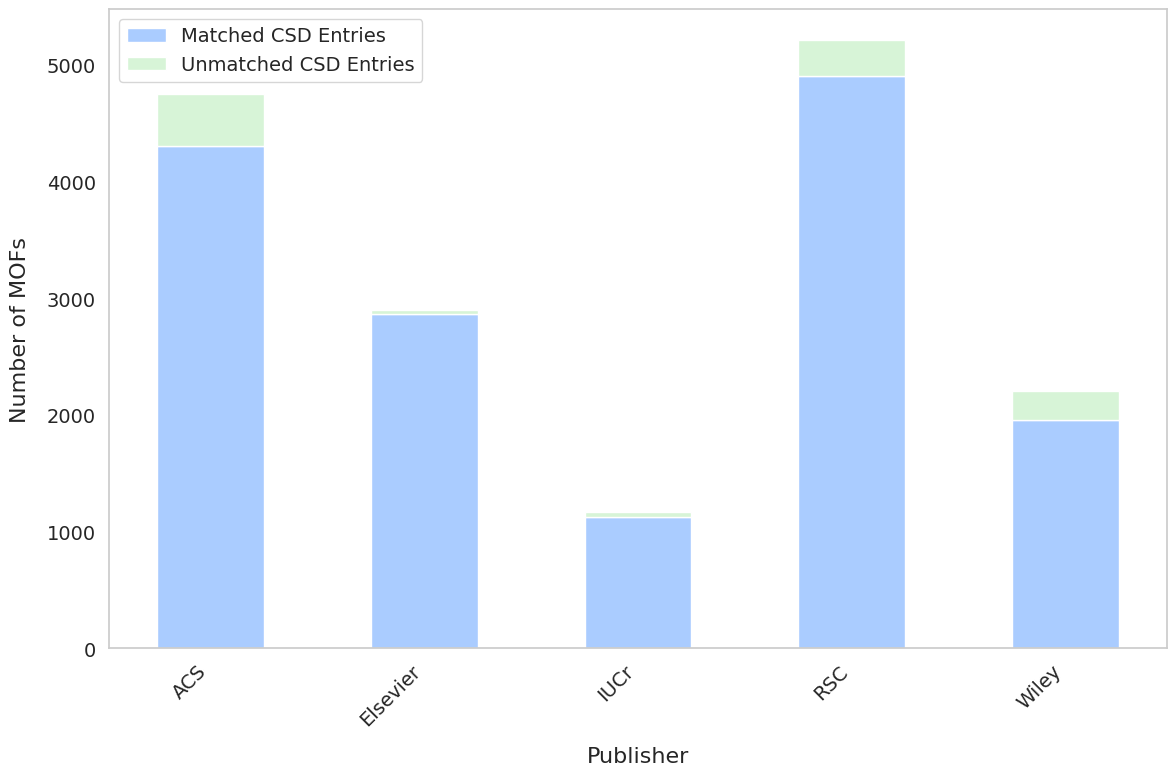

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files into DataFrames
input_data = pd.read_csv('Results/input_data.csv')
mof_chem_unity = pd.read_csv('Results/Matching/Final/MOF_ChemUnity.csv')

# Identify matched and unmatched CSD Codes
matched_codes = input_data[input_data['CSD code'].isin(mof_chem_unity['CSD Ref Code'])]
unmatched_codes = input_data[~input_data['CSD code'].isin(mof_chem_unity['CSD Ref Code'])]

# Group by Publisher and count CSD Codes
matched_counts = matched_codes.groupby('Publisher')['CSD code'].count()
unmatched_counts = unmatched_codes.groupby('Publisher')['CSD code'].count()

# Align the indices to make sure both have the same publishers
all_publishers = matched_counts.index.union(unmatched_counts.index)
matched_counts = matched_counts.reindex(all_publishers, fill_value=0)
unmatched_counts = unmatched_counts.reindex(all_publishers, fill_value=0)

# Set Seaborn style
sns.set_theme(style="whitegrid", font_scale=1.2)

# Create the plot
plt.figure(figsize=(12, 8))
bar_width = 0.5
x_positions = range(len(all_publishers))

plt.bar(
    x_positions, matched_counts, bar_width, 
    label='Matched CSD Entries', color='#aaccff'
)
plt.bar(
    x_positions, unmatched_counts, bar_width, 
    bottom=matched_counts, label='Unmatched CSD Entries', color='#d7f4d7'
)

# Customize plot
plt.xlabel("Publisher", fontsize=16, labelpad=12)
plt.ylabel("Number of MOFs", fontsize=16, labelpad=12)
plt.xticks(x_positions, all_publishers, rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title_fontsize=16, fontsize=14)

# Remove grid lines
plt.grid(False)

# Save the plot as an image for publications
plt.tight_layout()
plt.savefig("stacked_matched_vs_unmatched_csd_codes.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

